In [3]:
import fsps
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Problem 2: Stellar Mass
It is possible, although not ideal, to use B-band luminosity as a proxy for a galaxy's stellar mass. Adopting the same assumptions as in Problem 1 (a), use python fsps to determine a relationship between absolute B-band magnitude and total stellar mass. Make a plot that shows this theoretical relationship between of $M_B$ vs. M*. Why is B-band not a great proxy for a galaxy's stellar mass?

In [4]:
#initialize stellar population, identical to the population from problem 1
sp = fsps.StellarPopulation(sfh = 1, const = 1, imf_type = 2, zmet = 10, sf_trunc = 13.7)

In [30]:
# I use python fsps built in functions to get the stellar mass and b magnitudes
masses = []
b_mags = []
ages = np.linspace(1,13.7, 100)
for i in ages:
    sp.params['tage']= i
    #get the stellar mass and b band magnitude at an array of ages
    masses.append(sp.stellar_mass)
    b_mags.append(sp.get_mags(tage = i, bands = ['b'])[0])

In [28]:
#convert the b magnitudes into B luminosity
c = 2.99792458e18 # in ang/s
dist = 3.08677581467192e19 #10 pc in cm
m_ab0 = -2.5*np.log10(3631e-23) #AB magnitude zero point

f_nu = 10.**(-0.4*(b_mags+m_ab0))
L_nu = 4.*np.pi*(dist**2)*f_nu 

#find a linear fit for the masses and b luminosities
slope, intercept, r_value, p_value, std_err = stats.linregress(L_nu,masses)

In [29]:
print slope, intercept, r_value

7.14924197946e-21 0.617674543806 0.972174186714


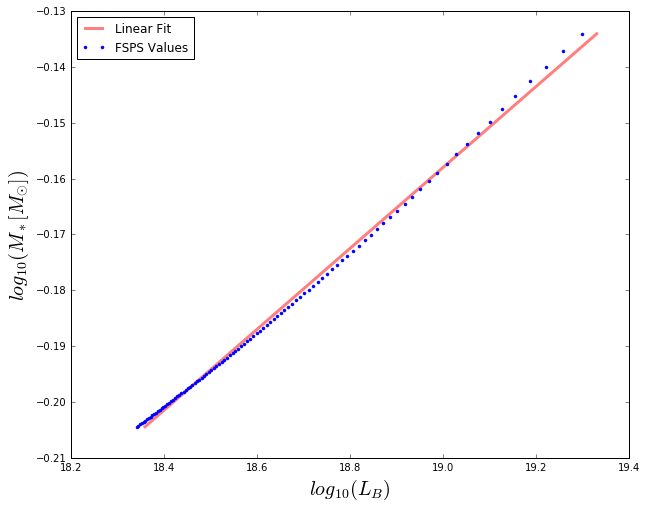

In [27]:
#linear fit
y_blum = []
for i in range(len(masses)):
    y_blum.append((np.log10(masses)[i]-intercept)/slope)
    #y_blum.append(np.log10(masses)[i]*slope + intercept)
  
#plot the masses vs. B magnitude
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(y_blum,np.log10(masses), label = 'Linear Fit', linewidth = 3, color = 'red', alpha = 0.5)
ax.plot(np.log10(L_nu),np.log10(masses), '.',markersize = 6, color = 'blue', label= 'FSPS Values')
ax.set_ylabel('$log_{10}(M_* [M_{\odot}])$', fontsize = 20)
ax.set_xlabel('$log_{10}(L_B)$', fontsize = 20)
#ax.set_ylim(18.41,18.74)
plt.legend(loc = 2)
plt.show()

B-band is not a great proxy for a galaxy's stellar mass because it lies in the bluer part of the spectrum. This can pose a problem because it is more sensitive to dust attenuation than redder parts of the spectrum. Therefore, this must be corrected and will be affected by uncertainties in the dust attenuation curve. Another issue is that the B-band is more sensitive to recent SF events than redder bands, arising from the fact that very young/large stars emit a lot of their light in the UV/blue wavelengths but don't account for the majority of the mass.

Additionally, the stellar masses are low because FSPS works by making a single solar mass over the entire age of the universe.